In [1]:
%pylab inline
from IPython.display import display, clear_output
import sys
import time
import pickle
import cgi
import urlparse
import utils
import collections

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib

pylab.rcParams['figure.figsize'] = 16, 12

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


### How many packages use HTTP or HTTPS more?

In [2]:
packages_mostly_https = {} # True if package uses TLS for most requests

counter = 0
for run in utils.runs.find():
    clear_output(wait=True)
    print(counter)
    sys.stdout.flush()
    counter += 1
    
    package_title = run["package_title"]
    
    if package_title in packages_mostly_https:
        continue
        
    requests = [pickle.loads(x) for x in run["requests"]]
    
    https_count = 0
    http_count = 0
    
    for request in requests:
        if request.scheme == "http":
            https_count += 1
        if request.scheme == "https":
            http_count += 1
            
    if https_count > http_count:
        packages_mostly_https[package_title] = True
    else:
        packages_mostly_https[package_title] = False

2424


In [3]:
http_count = 0
https_count = 0

for package in packages_mostly_https:
    if packages_mostly_https[package]:
        https_count += 1
    else:
        http_count += 1
        
print " HTTP Package Count: %s" % http_count
print "HTTPS Package Count: %s" % https_count

 HTTP Package Count: 1684
HTTPS Package Count: 741


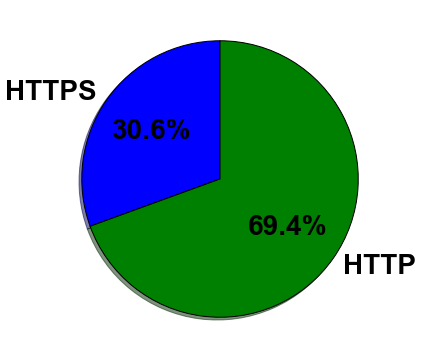

In [4]:
pylab.figure(1, figsize=(6,6))
ax = pylab.axes([0.1, 0.1, 0.8, 0.8])

labels = 'HTTPS', 'HTTP'
fracs = [https_count, http_count]

pylab.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

pylab.title('',bbox={'facecolor':'0.8', 'pad':5})

show()

### When do packages make network requests to the same URL with the same parameters using HTTP in one case and HTTPS in the other?

In [5]:
split_incidents = []

url_schemes = {} # key is hash of host, path, GET keys, POST keys. Value is (package_title, request) of hash

counter = 0
for run in utils.runs.find():
    clear_output(wait=True)
    print(counter)
    sys.stdout.flush()
    counter += 1
    
    package_title = run["package_title"]
    
    requests = [pickle.loads(x) for x in run["requests"]]
    
    for request in requests:
        url_parsed = urlparse.urlparse(request.path)
        hash_input = ",".join([request.host, url_parsed.path, ",".join(cgi.parse_qs(url_parsed.query).keys()), ",".join(cgi.parse_qs(request.content).keys())])
        
        if hash_input not in url_schemes:
            url_schemes[hash_input] = (package_title, request)
        elif url_schemes[hash_input][1].scheme != request.scheme:
            split_incidents.append((url_schemes[hash_input], (package_title, request)))

2424


In [6]:
split_incident_hosts = {}

for incident in split_incidents:
    if incident[0][1].host not in split_incident_hosts:
        split_incident_hosts[incident[0][1].host] = True

In [9]:
len(split_incident_hosts.keys())

194

In [8]:
n = 1
print split_incidents[i][0][1]
print split_incidents[i][1][1]

NameError: name 'i' is not defined

In [ ]:
print len(split_incident_hosts.keys())

In [ ]:
request = split_incidents[i][0][1]
",".join([request.host, url_parsed.path, ",".join(cgi.parse_qs(url_parsed.query).keys()), ",".join(cgi.parse_qs(request.content).keys())])

In [ ]:
split_incidents[i][1].request